## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

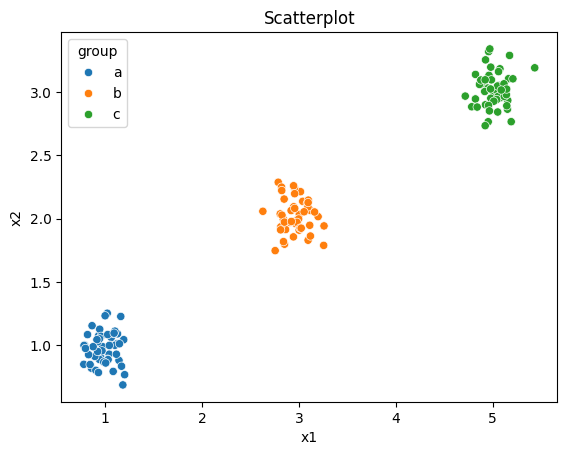

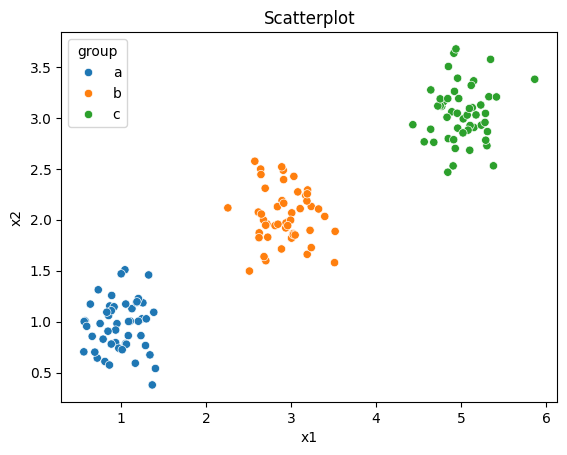

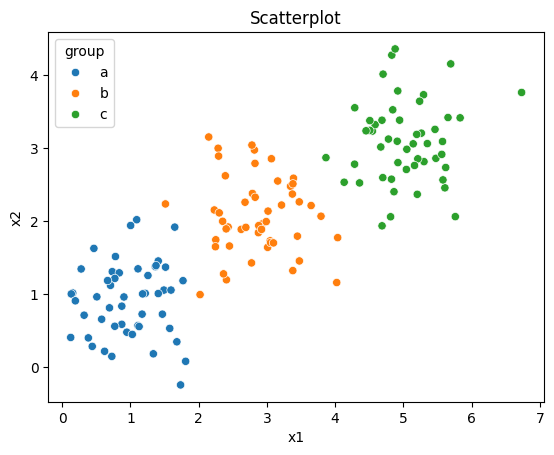

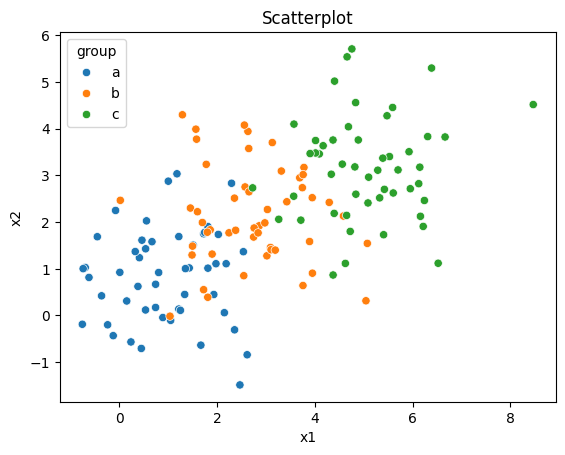

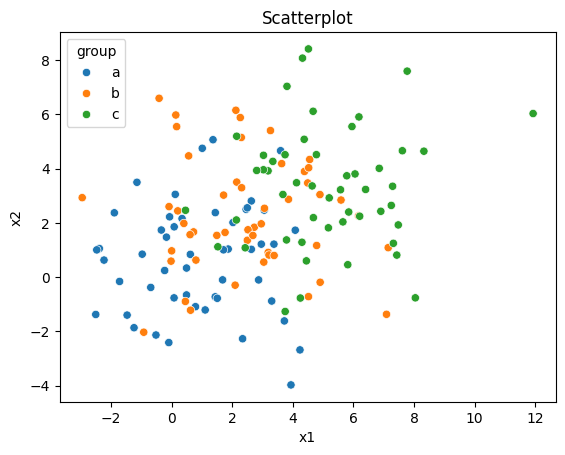

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]

for df in datasets:
    sns.scatterplot(data=df, x='x1', y='x2', hue='group')
    plt.title("Scatterplot")
    plt.show()

As the noise increases, visual distinction decreases.

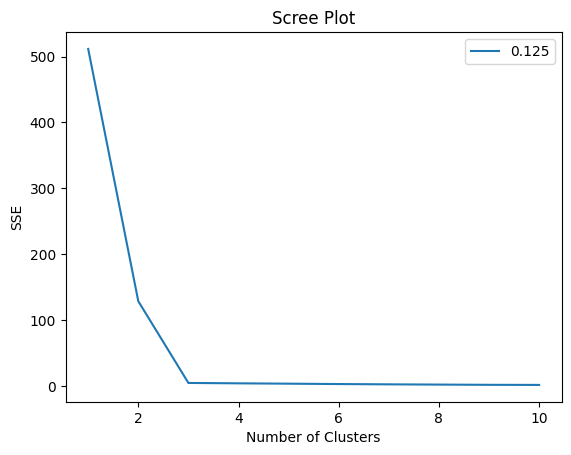

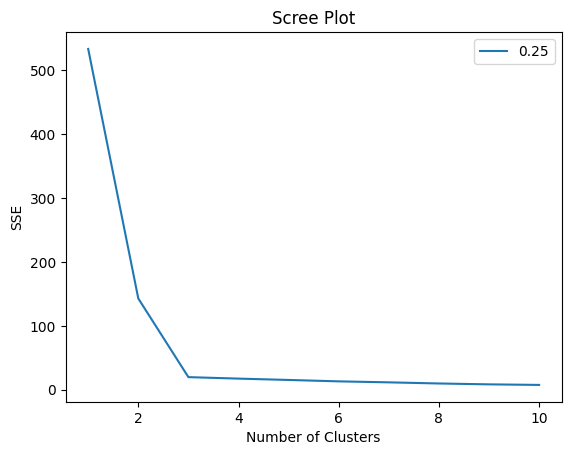

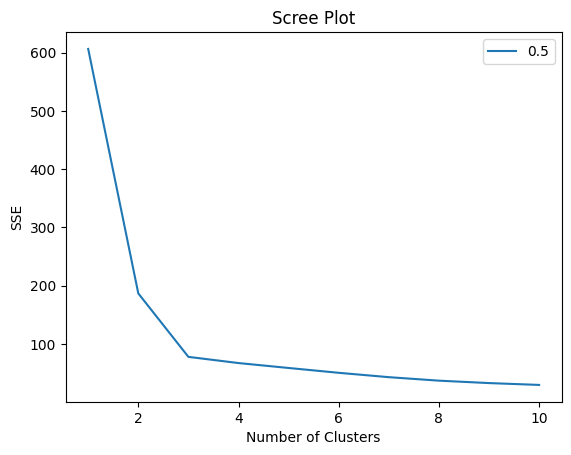

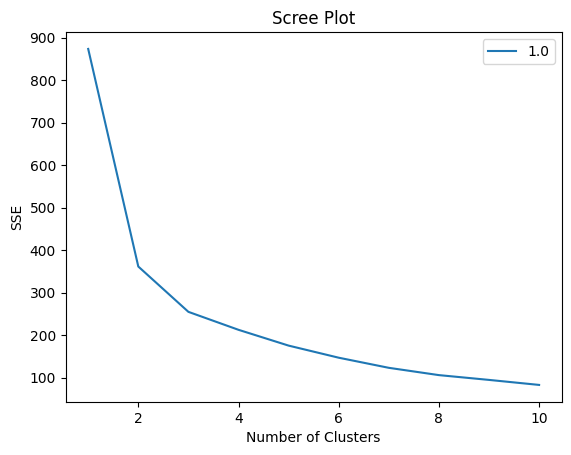

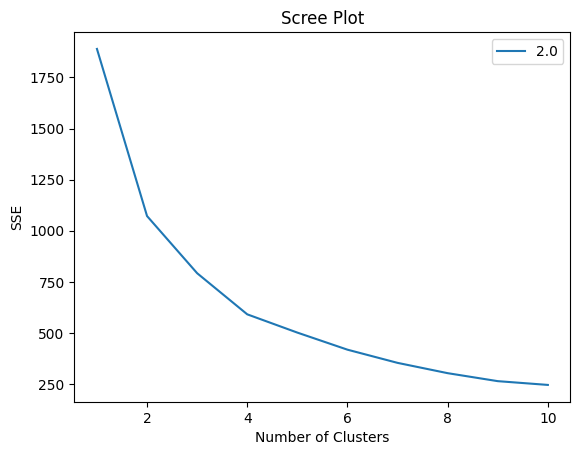

In [3]:
import numpy as np
from sklearn.cluster import KMeans

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise = ["0.125", "0.25", "0.5", "1.0", "2.0"]

k_bar = 10
curves = {}
ymax = 0.0

for df, value in zip(datasets, noise):
  X = df[["x1", "x2"]].to_numpy()
  SSE = []
  for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
  curves[value] = SSE
  ymax = max(ymax, max(SSE))

for value in noise:
  SSE = curves[value]
  scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, label=value).set_title('Scree Plot')
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.show()

As noise increses, the clear elbow in the scree plot becomes less distinct and more linear decline appears to occur. At low noise it is easier to determine the location of the elbow, increasing the confidence in the conclusion that k=3. This is not the case at higher noise levels making it harder to select a k value.

When using the elbow method, we are looking for the point at which adding more clusters does not significantly improve SSE. As described above, the elbow point was determined to be located at k=3 in the lower noise level plots. This is the same as the number of clusters seen in the scatter plots above. Overall, the elbow method is reliable when noise is low and clusters are distinct from one another.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [4]:
fundraising = pd.read_csv("2022 election cycle fundraising.csv")
fundraising.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [6]:
fundraising = fundraising.loc[:, ["Raised", "Spent", "Cash on Hand", "Debts"]]
fundraising = fundraising.replace("[\$,]", "", regex=True).astype(float)
fundraising = fundraising.replace(np.nan, 0)
fundraising.head()

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-180496044.py:2: SyntaxWarning: invalid escape sequence '\$'
  fundraising = fundraising.replace("[\$,]", "", regex=True).astype(float)


,Raised,Spent,Cash on Hand,Debts
0,7719396.0,7449678.0,851851.0,0.0
1,2192741.0,1243502.0,2472888.0,0.0
2,20993041.0,13957854.0,20942888.0,0.0
3,1211111.0,1173466.0,623472.0,0.0
4,1617611.0,1664674.0,1098579.0,0.0


In [7]:
from sklearn.preprocessing import MinMaxScaler

specifics = ['Raised', 'Spent']

X = fundraising[specifics].to_numpy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'SSE')

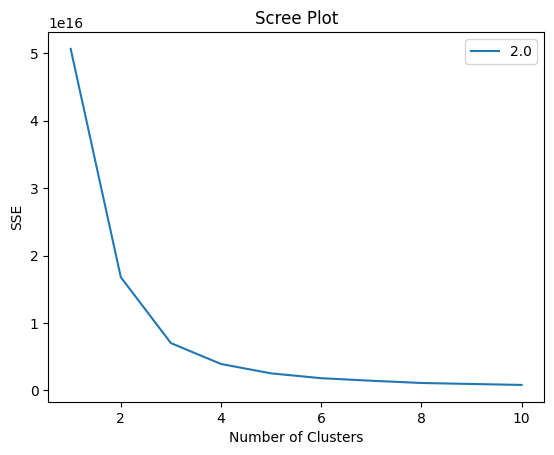

In [8]:
k_bar = 10
SSE = []

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, label=value).set_title('Scree Plot')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

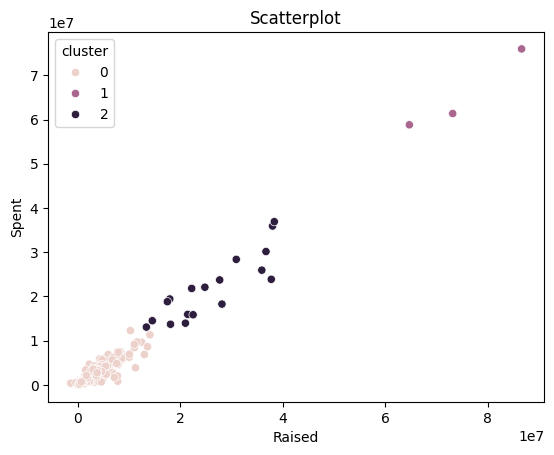

In [9]:
k_pred = 3
model = KMeans(n_clusters=k_pred, max_iter=300, n_init=10, random_state=0)
fundraising["cluster"] = model.fit_predict(X_scaled)

sns.scatterplot(data=fundraising, x="Raised", y="Spent", hue="cluster")
plt.title("Scatterplot")
plt.show()



In [10]:
fundraising.groupby("cluster").describe()

Raised                                                      \
         count          mean           std         min         25%   
cluster                                                              
0        516.0  2.399054e+06  2.312108e+06  -1386356.0    921446.0   
1          3.0  7.480175e+07  1.104336e+07  64682883.0  68911884.5   
2         18.0  2.593003e+07  8.550878e+06  13377243.0  18813017.5   

                                              Spent                ...  \
                50%          75%         max  count          mean  ...   
cluster                                                            ...   
0         1659007.5   3127004.25  14074831.0  516.0  1.851650e+06  ...   
1        73140886.0  79861177.50  86581469.0    3.0  6.537458e+07  ...   
2        23641082.5  34653682.00  38334636.0   18.0  2.180104e+07  ...   

        Cash on Hand              Debts                                    \
                 75%         max  count           mean           std  min   
cluster                                                                     
0          1832511.5  17419927.0  516.0  108375.125969  6.893448e+05  0.0   
1         17974556.0  22762985.0    3.0       0.000000  0.000000e+00  0.0   
2         14055519.5  21539824.0   18.0  677930.611111  2.767104e+06  0.0   

                                       
         25%  50%     75%         max  
cluster                                
0        0.0  0.0  104.25  13302000.0  
1        0.0  0.0    0.00         0.0  
2        0.0  0.0    0.00  11759857.0  

[3 rows x 32 columns]

There is a largely linear relationship between the amount a politcian raises and the amount they spend. Politicians that raise a lot of money and therefore spend more money comprise the smallest two clusters (clusters 1 and 2).

Text(0, 0.5, 'SSE')

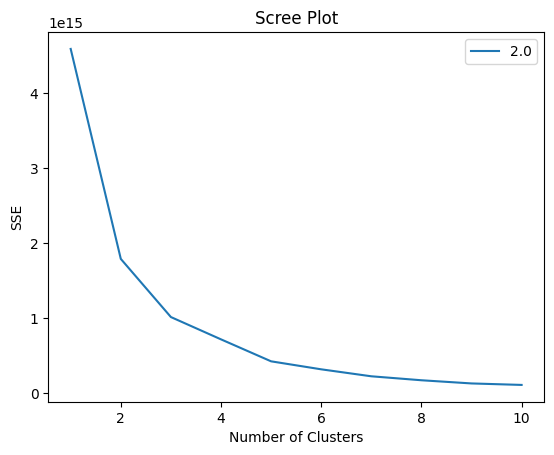

In [11]:
specifics = ['Cash on Hand', 'Debts']

X = fundraising[specifics].to_numpy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

k_bar = 10
SSE = []

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, label=value).set_title('Scree Plot')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

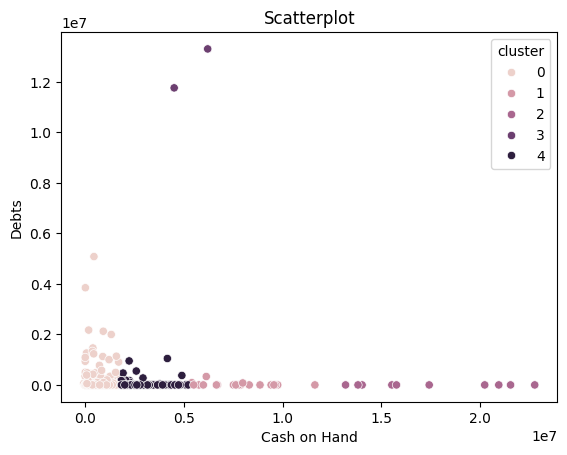

In [12]:
k_pred = 5
model = KMeans(n_clusters=k_pred, max_iter=300, n_init=10, random_state=0)
fundraising["cluster"] = model.fit_predict(X_scaled)

sns.scatterplot(data=fundraising, x="Cash on Hand", y="Debts", hue="cluster")
plt.title("Scatterplot")
plt.show()

In [13]:
fundraising.groupby("cluster").describe()

Raised                                                       \
         count          mean           std         min          25%   
cluster                                                               
0        386.0  1.804042e+06  2.334013e+06   -367162.0    813017.25   
1         22.0  1.396292e+07  1.411196e+07     20520.0   5611269.00   
2         10.0  3.251059e+07  2.755062e+07   6695582.0  11038458.25   
3          2.0  2.033582e+07  1.038751e+07  12990741.0  16663281.00   
4        117.0  4.784067e+06  5.301224e+06  -1386356.0   2094504.00   

                                             Spent                ...  \
                50%         75%         max  count          mean  ...   
cluster                                                           ...   
0         1386856.0   2097175.5  38334636.0  386.0  1.570352e+06  ...   
1        10040005.0  13953341.0  64682883.0   22.0  1.042342e+07  ...   
2        24780387.5  37282433.5  86581469.0   10.0  2.454996e+07  ...   
3        20335821.0  24008361.0  27680901.0    2.0  1.530485e+07  ...   
4         3369890.0   5622081.0  37993811.0  117.0  3.695840e+06  ...   

        Cash on Hand              Debts                              \
                 75%         max  count          mean           std   
cluster                                                               
0         1069893.25   1760692.0  386.0  9.824326e+04  4.179713e+05   
1         8718573.75  11633394.0   22.0  2.301027e+04  7.350986e+04   
2        20764969.25  22762985.0   10.0  0.000000e+00  0.000000e+00   
3         5781923.50   6206371.0    2.0  1.253093e+07  1.090460e+06   
4         3248487.00   5219723.0  117.0  3.960971e+04  1.524148e+05   

                                                                       
                min          25%         50%          75%         max  
cluster                                                                
0               0.0         0.00         0.0      3870.00   5081387.0  
1               0.0         0.00         0.0         0.00    333216.0  
2               0.0         0.00         0.0         0.00         0.0  
3        11759857.0  12145392.75  12530928.5  12916464.25  13302000.0  
4               0.0         0.00         0.0         0.00   1046178.0  

[5 rows x 32 columns]

There is no clear relationship between Cash on Hand and Debts, as this graph is much more horizontal compared the the graph in part 2. This is because except for a few outliers there are many means of getting money so cash on hand does not directly correlate to debt.

Text(0, 0.5, 'SSE')

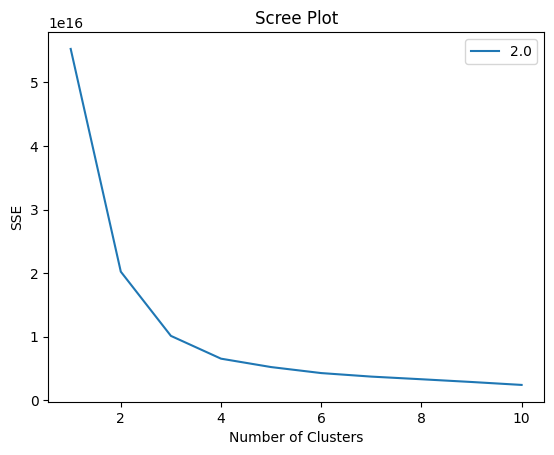

In [14]:
specifics = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

X = fundraising[specifics].to_numpy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

k_bar = 10
SSE = []

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, label=value).set_title('Scree Plot')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")


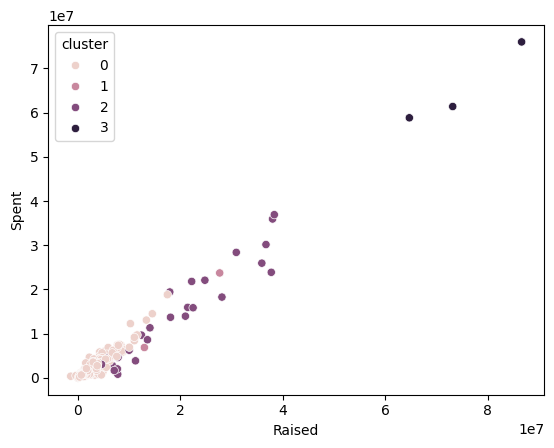

In [15]:
k_pred = 4
model = KMeans(n_clusters=k_pred, max_iter=300, n_init=10, random_state=0)
fundraising["cluster"] = model.fit_predict(X_scaled)

plot1 = sns.scatterplot(data=fundraising, x="Raised", y="Spent", hue="cluster")

The results are a lot less distinct and harder to read than the previous two parts.

Yes, the k-MC algorithm was usedul in analyzing patterns from the election. It allowed us to see the linear relationship between raised and spending, but also the lack of relationship between cash on hand it debt. Through the scatterplot graphs it was also easy to determine the presence of outliers. Clusters were not super distinct, however, so it is hard to make entirely confident determinations.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?